In [1]:
from gensim.models.word2vec import Word2Vec

In [2]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dr", "doctor"]] #remove task specific stopwords
  text = " ".join(text)
  # stemmer_ps = PorterStemmer()  
  # text = [stemmer_ps.stem(word) for word in text.split()] #stemming
  # text = " ".join(text)
  # lemmatizer = WordNetLemmatizer()
  # text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  # text = " ".join(text)
  return(text)

In [3]:
import pandas as pd
data = pd.read_csv('nykaa_data.csv')

In [4]:
data['review_processed']=data['review_text'].apply(lambda x:preprocess(str(x)))
data['review_processed']=data['review_processed'].apply(lambda x:x.split())


In [5]:
data

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url,review_processed
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,"[works, claims, difference, day, use, olay, cl..."
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,"[does, claims, best, thing, smoothens, ur, ski..."
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,"[using, product, months, perfect, combination,..."
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,"[oily, skin, whip, acts, great, base, primer, ..."
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...,"[good, refresh, try, products]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61279,1044490,Herbal Essences,17769058,Good,I use this thrice a week. Has helped me in mak...,Radhesh,2021-04-12 13:28:41,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,"[use, thrice, week, helped, making, hair, smoo..."
61280,1044490,Herbal Essences,17766838,Great,This shampoo has a amazing fragnance and textu...,Shalini Sirohi,2021-04-12 11:47:07,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,"[shampoo, amazing, fragnance, texture, just, l..."
61281,1044490,Herbal Essences,17765866,Really mild and nice,"Used it for the first time, feels really fresh...",Sana kanted,2021-04-12 10:58:34,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,"[used, time, feels, really, fresh, using, itch..."
61282,1044490,Herbal Essences,17761057,Amazing product!,One of the best shampoo which are sulphate and...,neeru chouhan,2021-04-11 21:44:55,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...,"[best, shampoo, sulphate, paraben, free, makes..."


In [6]:
model = Word2Vec(sentences=data['review_processed'].tolist(), vector_size=128, sg=1,min_count=5,window=5,workers=50,seed=10,epochs=50)


In [7]:
model.save('w2v_dr.w2v')

In [8]:
model=Word2Vec.load('w2v_dr.w2v')

In [9]:
vocab = model.wv.index_to_key

In [10]:
len(vocab)

4831

In [11]:
model.wv.most_similar('foundation', topn=10)

[('dewy', 0.6120667457580566),
 ('foundations', 0.5816097855567932),
 ('compact', 0.5626639127731323),
 ('concealer', 0.56120765209198),
 ('moisturizer', 0.5216017961502075),
 ('cakey', 0.5208151936531067),
 ('glow', 0.5093779563903809),
 ('coverage', 0.5063583254814148),
 ('foundationit', 0.4971425533294678),
 ('skin', 0.49679282307624817)]

In [12]:
model.wv.most_similar('concealer', topn=25)

[('foundation', 0.5612077116966248),
 ('corrector', 0.5241275429725647),
 ('undereye', 0.5149751901626587),
 ('circles', 0.5110546350479126),
 ('conceal', 0.4877631664276123),
 ('concealers', 0.4733068645000458),
 ('coverage', 0.4687221348285675),
 ('concealing', 0.4623009264469147),
 ('undereyes', 0.46213623881340027),
 ('rewind', 0.4577420651912689),
 ('blemishes', 0.4473319351673126),
 ('concealor', 0.4404936730861664),
 ('chisel', 0.43721359968185425),
 ('cancel', 0.42477115988731384),
 ('foundations', 0.4168665409088135),
 ('neutralizing', 0.4160933494567871),
 ('bronzer', 0.4111899137496948),
 ('y', 0.4067641794681549),
 ('mattifying', 0.40617942810058594),
 ('caste', 0.4047350585460663),
 ('orange', 0.40249863266944885),
 ('device', 0.40233373641967773),
 ('blendable', 0.40083518624305725),
 ('primer', 0.3996026813983917),
 ('stick', 0.3988599479198456)]

In [13]:
model.wv.similarity('concealer', 'undereyes')

0.4621362

In [14]:
model.wv.similarity('concealer', 'face')

0.38345614

In [15]:
model.wv.similarity('concealer', 'matte')

0.1633238

In [16]:
model.wv.similarity('concealer', 'dewy')

0.28505522

In [25]:
model.wv.similarity('concealer', 'neutralizing')

0.4160934

In [28]:
import numpy as np

v_concealer = model.wv['concealer']
v_undereye = model.wv['undereye']
v_neutralizing = model.wv['neutralizing']
best_product = v_concealer + v_undereye + v_neutralizing
np.dot(best_product, v_concealer)/(np.linalg.norm(best_product)* np.linalg.norm(v_concealer))

0.7902063

In [29]:
model.wv.vectors.shape

(4831, 128)

In [31]:
outdata=pd.DataFrame(model.wv.vectors)

In [32]:
outdata

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.100181,0.234828,-0.071396,-0.240994,-0.169780,0.058456,0.031651,0.116563,0.134168,0.178972,...,-0.073763,0.101838,-0.054308,0.024071,-0.032207,0.134994,0.035234,0.025535,0.136204,0.071315
1,0.246790,0.028968,-0.126344,-0.046032,-0.001203,0.100469,-0.055085,0.182893,-0.102368,-0.196127,...,-0.029480,-0.034052,-0.066148,0.154120,-0.018727,0.016127,-0.242564,-0.039016,-0.027179,0.005233
2,-0.072919,0.188653,0.086753,-0.142808,0.135546,0.204895,-0.412297,0.064540,0.273475,-0.060472,...,0.050080,-0.038740,-0.226644,0.202074,-0.004565,-0.030379,0.086778,-0.284893,-0.227689,0.081331
3,0.220636,-0.156184,-0.014661,0.175513,-0.069200,-0.017906,-0.075669,0.116431,-0.200812,0.142553,...,-0.092260,0.273526,-0.104927,0.002903,0.259122,-0.091973,-0.009468,-0.243331,0.011773,-0.002560
4,0.506820,0.111395,-0.029903,-0.165012,-0.024282,0.333003,-0.037680,-0.158498,0.347472,-0.308001,...,0.242339,0.061488,-0.137436,0.305632,0.362431,-0.025000,0.005008,0.121519,-0.356704,-0.232283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,-0.329413,-0.406436,-0.574160,0.316748,0.203003,0.194845,0.280494,0.033477,-0.121221,-0.031079,...,0.111179,0.872512,-0.141897,-0.329940,0.529689,0.209374,0.135615,0.037923,0.140297,-0.101122
4827,0.264708,-0.056675,0.019830,-0.220383,0.310891,0.228747,-0.295621,-0.180486,-0.272427,-0.134972,...,-0.027467,0.372543,-0.043323,0.316230,-0.111129,-0.048083,0.478933,0.376054,-0.439121,-0.563476
4828,-0.156521,0.166750,-0.147538,-0.155972,-0.291908,0.335656,-0.019490,0.393516,0.085879,0.107646,...,-0.335206,-0.215723,-0.022871,0.127587,0.551468,0.217955,0.059797,-0.112535,0.126845,-0.410008
4829,0.197258,-0.376190,0.083634,-0.433792,0.016008,0.170265,-0.216075,0.106395,-0.343601,0.312779,...,-0.008478,-0.207650,0.326311,-0.035847,-0.077552,-0.075697,0.667743,-0.042233,-0.118845,0.174080


In [22]:
outdata.to_csv('word2vec_data.tsv',sep='\t',index=False,header=False)

In [23]:
pd.DataFrame(model.wv.index_to_key).to_csv('word2vec_data_words.tsv',sep='\t',index=False,header=False)

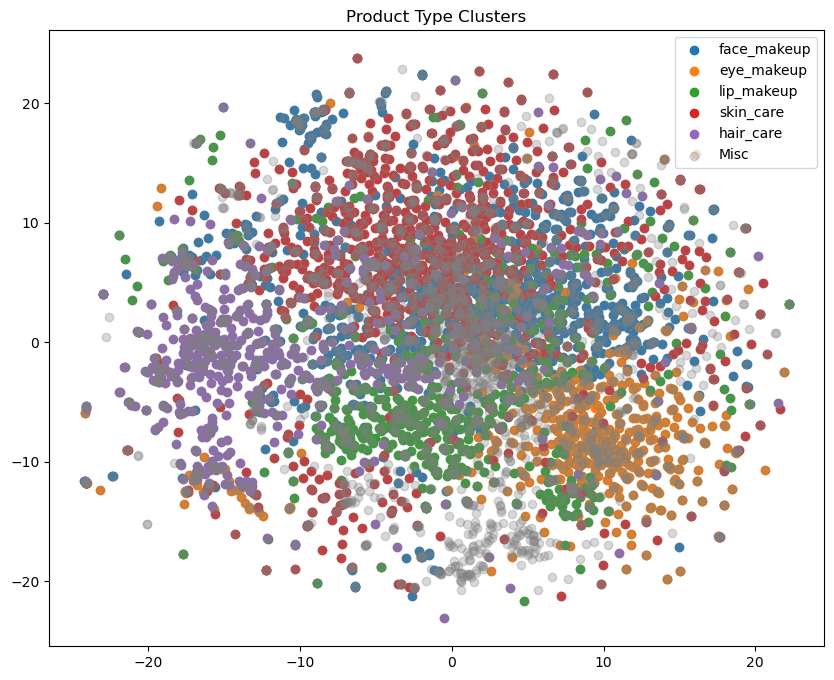

In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = model.wv.index_to_key 
word_vectors = model.wv.vectors  

# Defining categories
categories = {
    'face_makeup': ['foundation', 'concealer', 'powder', 'blush', 'highlighter', 'compact','corrector'],
    'eye_makeup': ['mascara', 'eyeliner', 'eyeshadow', 'eyebrow','kajal','eye'],
    'lip_makeup': ['lipstick', 'lipgloss', 'lipliner','lipgloss','lip'],
    'skin_care':['serum','moisturizer','sunscreen','toner','nightcream','patch'],
    'hair_care':['shampoo','hairoil','hairgel','conditioner','hairmask','hair']
}

# Categorizing words based on predefined categories
def categorize_product(word, category_dict):
    for category, keywords in category_dict.items():
        if word in keywords:
            return category
    return 'misc'  

# Categorize words
labels = np.array([categorize_product(w, categories) for w in words])

# Clustering using K-means
kmeans = KMeans(n_clusters=len(categories) + 1, random_state=0)  # +1 for 'misc'
clusters = kmeans.fit_predict(word_vectors)

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_vectors = tsne.fit_transform(word_vectors)

# Visualization
plt.figure(figsize=(10, 8))
for category, cluster in zip(categories.keys(), np.unique(clusters)):
    indices = clusters == cluster
    plt.scatter(reduced_vectors[indices, 0], reduced_vectors[indices, 1], label=category)
plt.scatter(reduced_vectors[labels == 'misc', 0], reduced_vectors[labels == 'misc', 1], label='Misc', c='grey', alpha=0.3)
plt.legend()
plt.title('Product Type Clusters')
plt.show()
